## Approximation of the Koopman operator for the triple well 2D potential using 2D Gaussian basis functions

In [27]:
# Important libraries required

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np                       
import scipy as sp
import jax.numpy as jnp
import jax
import importlib

import sys
sys.path.append("C:\\Users\\tabis\\Desktop\\PhD_first_year\\Extended_summer_project\\Codes\\d3s")
#TODO: Ask Stefan if I can copy d3s code for defining the domain
import d3s.domain as domain
from systems import EulerMaruyamaData

from deeptime.data import triple_well_2d, double_well_2d

import optimal_koopman
importlib.reload(optimal_koopman)

from optimal_koopman import OptimalKoopmanParameter, basis_func_nD, psi_nD, sortEig, get_rcparams, set_size, multivariate_gaussian, generate_surface
plt.rcParams.update(get_rcparams())

jax.config.update("jax_enable_x64", True)

## Triple-well 2D data

In [4]:
# Different parameters for the TW2D

evs = 5              # Number of dominant eigenvalues and eigenfunctions to be approximated

h_em = 1e-3             # Step size for Euler-Maruyama

iters = 500

beta_tw = 1.68             # Inverse temperature

m = 1000               # Number of the data points
dimension = 2

X = np.random.uniform(-2, 2, size=(dimension, m))          # Data points in x  

data_tw = EulerMaruyamaData(m, X, h_em, iters)      # Calling Euler-Maruyama class

Y = data_tw.get_triple_well_2d_data(beta_tw)                # Data points in y

In [17]:
# Define domain of the basis functions

bounds = np.array([[0, 2],[-2, 2]])      # Intervals on X and Y axis
boxes = np.array([5, 5])               # Number of boxes in each interval
Omega = domain.discretization(bounds, boxes)

# Centers of the Gaussian functions
n = boxes.prod()                                # Number of basis functions
d = boxes.size
c = Omega.midpointGrid()                       # Mid point grid in the given domain
c = c.T

# Covariance matrices
sigmas = 0.2 * np.ones(n)

W_init = np.c_[sigmas, c]                          # Initial basis parameters
K_init = np.zeros((n, n))                          # Initial Koopman matrix 
epss = 1e-3
loops = 100                                        # Number of iterations of gradient descent

# Transformed data matrices

psi_x = psi_nD(X, W_init)
psi_y = psi_nD(Y, W_init)

In [18]:
# Calculating step-size of GD

D = psi_x @ psi_x.T                         # D is the hessian of the main function 
e = np.linalg.eig(D)                            # eigenvalues and eigenvectors of hessian 
L = np.max(e[0])                                # e[0] is the array of eigenvalues and L is maximum eigenvalue
hk = np.real(1/L)
hw = hk
print(hk)

0.06705585484826043


In [13]:
# Approximate the optimal K matrix and basis parameters using gradient descent based algorithms

# opt_K_W = OptimalKoopmanParameter(epss, loops, psi_nD)    # Initialize the class

## Adam

# K_adam_ou, W_adam_ou, f_vals_adam_ou, param_f_vals_adam_ou = opt_K_W.adam(K_init, W_init, X, Y, hk=0.01, hw=0.01)

The above code takes time to run. Below are the optimal K and basis parameters already run.

In [15]:
# Optimal basis parameters (W) and K matrix

W_adam = np.array([[ 1.35153616, -0.88651621, -1.49726579],
       [ 1.25072317, -0.81686929, -1.4664255 ],
       [ 0.7384256 , -0.17791168,  0.21139672],
       [ 1.27960479, -1.38384593,  0.26862979],
       [ 1.14574418, -1.0926014 ,  1.72465541],
       [ 0.50610193,  0.48704438, -1.26180406],
       [ 0.33817316,  0.62924739, -0.38872873],
       [ 0.14084121,  0.64515088,  0.17808882],
       [ 0.36458347,  0.90430824,  0.88425001],
       [ 1.02708471, -0.93718635,  1.74560849],
       [ 0.68215559, -0.72012334, -1.14006162],
       [ 0.09507312,  0.8751528 , -0.05821018],
       [ 0.42996849,  0.38274317,  0.21918747],
       [ 0.27913775,  0.99570625,  0.7935477 ],
       [ 0.80511341,  0.20634353,  1.59086304],
       [ 1.03119218,  0.81538284, -1.52756616],
       [ 0.33476531,  1.25735277, -0.55511588],
       [ 0.17970688,  1.2391131 , -0.07321306],
       [ 0.42475671,  1.66700849,  0.83838433],
       [ 0.23910707,  1.24832708,  1.55552736],
       [ 0.98502904,  1.64818355, -1.73141707],
       [ 1.11474407,  1.5280626 , -0.33096365],
       [ 0.71099029,  1.30398471, -0.12509103],
       [ 0.77975381,  1.66064923,  0.66380732],
       [ 1.07327124,  1.40456541,  1.69035409]], dtype='float64')

K_adam = np.array([[ 7.39721719e-01,  9.42956678e-01,  3.74713335e-01,
         9.71651439e-01,  6.35203706e-01,  4.92011673e-02,
         6.22256687e-02,  7.80985917e-02, -2.83541785e-02,
         2.38655979e-01,  6.66966534e-01,  5.32814844e-02,
         6.78685310e-02, -6.22762700e-02,  8.90835176e-02,
         1.75836007e-01,  9.62571920e-02,  3.96342409e-02,
         5.08431934e-02, -8.66970119e-03,  4.29138600e-02,
         2.56785804e-01,  2.95806831e-01,  1.64302656e-01,
         5.87915363e-02],
       [ 1.79114663e-01, -7.51294370e-02,  3.93729000e-02,
        -2.51529343e-01, -5.64511090e-01, -2.12919330e-02,
        -9.40906419e-03, -6.44758574e-02,  5.15884098e-02,
        -1.71540559e-01,  3.22605598e-02, -1.77473523e-02,
        -3.69856808e-02,  7.08600740e-02, -3.43121405e-02,
         6.70916611e-02, -8.44981497e-02, -2.58973326e-02,
        -4.83053889e-02,  8.37112643e-03,  6.57169598e-03,
        -1.90452823e-02, -1.84018142e-01, -6.95746699e-02,
         3.46882330e-03],
       [-3.62282042e-02, -3.81690512e-02,  1.09892361e-02,
        -2.29159128e-02, -6.74698398e-02, -1.33909136e-02,
         6.40734007e-02,  3.05571285e-02, -2.50368508e-03,
        -8.24004289e-02, -6.47412254e-02,  4.84154634e-02,
         4.69423924e-02,  2.11306941e-04, -7.02252200e-02,
        -3.21907561e-02, -1.61314701e-02,  7.65950276e-02,
        -1.45704126e-02, -1.35356893e-03, -1.15939792e-02,
        -2.36234244e-02, -3.36215856e-02, -1.00072666e-02,
        -4.31268722e-02],
       [ 5.38908254e-02,  3.25931042e-02,  1.25072860e-01,
         3.46973508e-01,  1.60167755e-01,  1.67940173e-03,
        -6.50182635e-02, -1.84232200e-02, -2.32353892e-02,
         1.07466139e-01, -5.06895306e-02, -4.41770747e-02,
        -2.29343274e-02, -4.69721784e-03, -6.87805292e-02,
        -2.63585708e-02, -1.03731980e-02, -2.89473960e-02,
        -4.35681678e-03,  1.81306280e-03, -1.31778041e-02,
        -7.48629005e-02, -6.28304322e-02, -7.21775268e-02,
        -4.02581391e-02],
       [ 3.17319465e-01,  2.68651982e-01,  4.06768445e-01,
         6.09986533e-01,  8.42803536e-01, -2.49319896e-03,
         1.26832330e-01, -3.28881269e-02,  7.12243742e-02,
         1.02474581e+00,  1.41541329e-01,  1.75340813e-01,
        -5.88027540e-03, -4.98898653e-02,  8.07855513e-01,
         3.77435828e-02, -3.49169645e-02, -1.16100747e-03,
        -4.35378801e-02, -6.50969516e-03, -1.71687292e-03,
         2.96707612e-02, -1.57990415e-01, -5.97707527e-02,
         1.76035539e-01],
       [-2.21810649e-01, -2.21363172e-01,  1.60212595e-02,
        -2.71941878e-01, -6.56864447e-02, -2.31257698e-02,
         1.29178542e-01,  9.90969398e-02,  1.66310576e-01,
        -3.00267697e-02, -2.12583778e-01,  1.15394757e-01,
         1.62514447e-01,  1.11268290e-01,  1.04191286e-01,
         4.21412541e-02,  7.79347454e-02,  1.02207648e-01,
         5.96732196e-02,  2.38629110e-04,  5.35733635e-02,
         4.10093806e-01,  3.72020417e-01,  4.32097095e-01,
         2.07359853e-01],
       [-1.60562751e-01, -1.53607963e-01, -7.26535187e-02,
        -1.97055956e-01, -5.54130509e-02, -5.93357492e-03,
        -2.41477636e-02, -3.12043200e-02,  8.31496571e-02,
        -2.72720467e-02, -1.18867565e-01,  4.02716575e-02,
         5.68588968e-02,  6.06272434e-02,  4.35285347e-02,
         1.01810217e-03,  2.87878093e-02,  9.65554543e-02,
         1.10871474e-01,  7.79958088e-04,  2.66085410e-02,
         1.91107537e-01,  1.99897908e-01,  2.57200271e-01,
         1.40974665e-01],
       [-3.63882289e-02, -3.85861072e-02,  1.01020072e-01,
         5.65087900e-02,  8.64595734e-02, -7.79156008e-03,
        -4.17505226e-02,  5.03927370e-02,  1.65403797e-01,
         9.02814217e-02, -7.02675503e-02, -2.98744523e-02,
         2.14185678e-01,  1.18945079e-01,  1.02498319e-01,
        -1.28625595e-01, -1.34765974e-01,  8.21920407e-02,
         4.30245881e-03, -1.65431633e-04, -8.77094230e-02,
        -2.75261993e-01, -3.18335187e-01, -1.09627712e-01,
         3.94845607e-02],
       [ 1.52003791e-02,  1.44552305e-02, -9.69608456e-03,
        -1.69582324e-01, -2.84772721e-01,  1.62472656e-03,
        -1.52746920e-03, -8.99101053e-03, -8.19638417e-02,
        -3.68051748e-01,  2.87221076e-02, -1.09363258e-01,
         5.26171373e-03, -3.23640922e-02, -3.53373050e-01,
         8.55981283e-02,  6.38460665e-02,  3.46257921e-02,
         1.90268799e-02, -3.31833231e-03,  4.48654820e-02,
         1.96676235e-01,  2.36672413e-01,  1.11482918e-01,
        -1.00155601e-01],
       [-2.60697641e-01, -2.28915880e-01, -2.57980093e-01,
        -3.25378131e-01, -2.60953328e-01,  2.27251335e-03,
        -7.95571898e-02,  3.64192459e-02, -4.91160100e-02,
        -4.25912220e-01, -1.27034610e-01, -1.79995601e-01,
         1.96945256e-02,  6.89798794e-02, -2.89583144e-01,
         8.87350235e-04,  5.24361489e-02,  1.07552324e-02,
         5.71755212e-02,  5.78979068e-03,  1.97307197e-02,
         1.21069887e-01,  2.60090731e-01,  1.65981010e-01,
         5.03354244e-02],
       [-1.07788527e-01, -6.19209806e-02, -1.30094446e-01,
        -2.13269100e-01, -5.33861259e-02,  1.46237158e-02,
        -4.03697983e-03, -5.23056390e-03,  3.47759932e-02,
        -6.70904970e-02,  4.50930958e-02,  6.52833112e-03,
        -2.19954767e-02,  3.29962461e-02,  2.26491027e-03,
        -1.62527959e-02, -9.34094004e-03, -4.72748020e-02,
         1.22052692e-02, -1.07335540e-04, -1.40614546e-02,
        -7.36922912e-02, -8.18327991e-02,  5.10757871e-03,
        -5.38660040e-03],
       [ 7.94916638e-02,  6.81671731e-02, -3.58908135e-03,
         4.35343496e-02, -2.17714357e-02,  2.51599476e-02,
         2.74973287e-01,  3.44816959e-02, -1.10704485e-01,
        -1.39696192e-02,  4.41464707e-02,  3.02939659e-01,
         6.76752558e-02, -9.11307378e-02, -7.65137814e-02,
         6.37780763e-02, -1.96220865e-02, -3.84896881e-02,
        -9.78288368e-02, -9.69145696e-05,  9.68487660e-03,
        -8.21018103e-02, -9.79955928e-02, -1.95347431e-01,
        -1.23059922e-01],
       [-4.08110662e-02, -3.28258255e-02, -3.99695642e-02,
        -2.28298007e-01, -1.51693597e-01,  2.67353145e-02,
         1.73227596e-01, -5.26289814e-02,  4.23549781e-02,
        -1.21028000e-01, -2.37442201e-02,  7.94515143e-02,
        -3.60875395e-02,  3.24529124e-02, -3.54484036e-02,
         1.73982550e-01,  1.53453305e-01,  1.02221634e-02,
         1.87866837e-02,  1.27150552e-03,  1.03758822e-01,
         4.04359742e-01,  4.29479698e-01,  2.34346905e-01,
         9.21436729e-02],
       [-5.72155611e-02, -5.63575449e-02, -8.79997504e-02,
         8.82177826e-03,  1.23429795e-01,  6.80642471e-03,
         1.45343580e-01,  5.23515502e-02,  5.97010777e-02,
         2.21297170e-01, -5.30485855e-02,  4.42943042e-01,
         6.86201698e-02,  2.57438536e-02,  1.82143037e-01,
        -5.23096747e-02, -7.84153875e-02, -9.17012561e-02,
         3.14526406e-02,  3.64780180e-03, -3.19343466e-02,
        -1.33553024e-01, -1.40860329e-01, -6.33347911e-02,
         5.42294420e-02],
       [-4.24145883e-02, -3.96507855e-02,  6.63782322e-02,
         1.73127962e-02,  8.85909082e-02, -1.99902292e-03,
        -4.75801408e-02,  1.51654138e-02,  1.17202833e-02,
         1.18099716e-01, -2.11507296e-02,  6.27574053e-02,
         7.41949838e-02, -3.22936264e-02,  1.94143872e-01,
        -6.57869318e-02, -4.78719921e-02, -8.32072223e-02,
        -2.47783093e-02,  2.35838233e-03, -3.90877087e-02,
        -1.86132904e-01, -2.33334020e-01, -1.39292676e-01,
         3.39908653e-02],
       [-2.32149584e-01, -2.17177600e-01, -1.40405793e-01,
        -2.15149165e-02,  1.01598483e-01,  2.12681111e-02,
        -8.16041437e-02, -8.99506974e-02, -1.78436987e-01,
         4.38467738e-02, -2.03383110e-01, -8.57209868e-02,
        -5.74698056e-02, -1.20219396e-01, -9.54733235e-02,
        -6.45819910e-02, -4.08520081e-02,  1.57029492e-02,
        -3.08362030e-02, -1.38006431e-04, -2.32569538e-02,
        -2.47004916e-01, -1.15990203e-01, -3.36532299e-01,
        -1.34460575e-01],
       [ 6.38547672e-02,  7.05936254e-02,  1.57001291e-01,
         2.78918039e-02, -2.87312562e-02,  1.80959484e-02,
         2.58379055e-01,  1.53903298e-01,  5.82524273e-02,
        -5.85977335e-03,  1.05051490e-02,  2.85911270e-01,
         4.90433833e-02,  3.98512375e-02,  1.69768652e-02,
         3.39440374e-02, -7.92090319e-03, -1.36547561e-01,
        -7.07523127e-02,  1.19050194e-03, -1.40842218e-02,
        -1.17074560e-01, -1.74657548e-01, -1.62317285e-01,
        -4.10471872e-02],
       [-8.89477889e-03, -5.44673894e-03, -4.66344536e-02,
        -6.11780246e-02, -5.76252485e-02, -6.84439225e-03,
        -1.83453121e-02,  1.03542556e-01, -1.14159066e-02,
        -2.52814347e-02, -1.21721523e-02, -9.73598464e-03,
        -4.85572578e-02, -2.12240282e-02, -2.73287818e-02,
        -4.41399847e-03,  2.32081950e-02,  3.02325275e-02,
        -4.39562816e-03,  9.44504707e-04,  9.05041888e-03,
         7.87140388e-03,  3.13437302e-02,  1.46761807e-02,
        -1.10140758e-02],
       [ 7.36619187e-05, -1.64454402e-02, -7.94055353e-02,
        -8.26842630e-02, -2.30983518e-02,  1.62843742e-02,
         1.28126414e-01, -2.76457664e-02, -2.25872731e-01,
        -4.62993078e-02,  1.49694219e-02,  1.09609776e-01,
         9.47444057e-03, -1.80527070e-01, -1.17715703e-01,
         8.81440806e-02,  1.04639300e-01,  9.63917390e-03,
        -1.03996977e-01, -1.24974601e-03,  4.99387536e-02,
         5.18185570e-02,  9.08214268e-02, -1.72246043e-01,
        -1.75189259e-01],
       [-7.37534472e-02, -6.66237747e-02, -9.52737614e-02,
        -1.18896132e-01, -9.10889265e-02, -8.16285854e-03,
        -1.16136840e-01,  9.39502814e-03,  2.03413669e-01,
        -9.19368337e-02, -1.24905539e-02, -8.08454846e-02,
         1.32034877e-01,  1.63014920e-01, -6.93831853e-02,
        -5.34510133e-02, -3.79244985e-03,  7.55105406e-02,
         6.27161067e-02,  3.23937150e-03, -1.99854184e-02,
        -3.94983825e-02, -5.18671340e-02,  7.44997619e-02,
         4.75426621e-02],
       [ 1.22616781e-01,  9.65584036e-02,  2.66190716e-01,
         2.04124874e-02, -2.34908457e-02,  9.74825898e-04,
         2.57086554e-01,  8.41519779e-02,  1.62919289e-01,
        -9.53518862e-03,  9.01917709e-03,  2.84618652e-01,
         2.17632736e-01,  1.04621502e-01,  1.29832625e-01,
         2.42767492e-01,  1.45061958e-01,  3.05056201e-01,
         7.43662150e-02,  2.46767027e-04,  1.35106161e-01,
         7.91187276e-01,  7.03705604e-01,  6.23425949e-01,
         3.03434483e-01],
       [ 1.82044822e-01,  1.59914926e-01,  3.84691074e-02,
         5.44413977e-02, -6.02058485e-02,  5.49191409e-03,
        -2.16274706e-02,  9.06047972e-02,  1.04474201e-01,
        -5.34322054e-03,  7.73512865e-02, -1.56428530e-01,
         1.56411070e-01,  6.84107484e-02,  4.00821291e-02,
         1.22408429e-01,  1.11225676e-01,  9.37298503e-02,
         7.07380291e-02,  8.92797986e-04,  7.94384324e-02,
         3.59262498e-01,  4.12083592e-01,  2.70214380e-01,
         1.63146966e-01],
       [-1.01392635e-01, -1.15586921e-01,  4.12209104e-03,
        -8.21660721e-03,  1.05902481e-01, -1.42314853e-02,
        -6.91587190e-02, -8.73429449e-03, -1.47023829e-01,
         1.91136845e-02, -3.58303447e-02, -8.04539912e-02,
         1.01034536e-01, -1.02300697e-01,  2.95566446e-03,
        -2.02313007e-02, -7.37420059e-02,  3.17650742e-04,
        -3.15143181e-02, -2.83123162e-03, -1.64104403e-02,
         5.55865519e-02,  3.11668512e-02,  5.36365954e-03,
        -4.27771714e-02],
       [ 9.84593116e-03,  3.38640606e-02,  1.68974971e-01,
         4.66586322e-02, -2.20490097e-02,  1.21167391e-02,
         1.20656271e-01,  1.91162006e-02,  2.21522972e-01,
         1.66419023e-02, -5.42169138e-02,  2.25335766e-01,
         9.45678506e-02,  1.47732600e-01,  6.32426817e-02,
         3.32896135e-02,  8.83825793e-03,  8.35296243e-02,
         8.41175716e-02,  2.88818216e-03,  1.52096380e-02,
         1.10662605e-01,  5.49958900e-02,  1.86707597e-01,
         1.64553566e-01],
       [ 1.61891314e-01,  1.28066133e-01,  2.01245134e-01,
         1.93226965e-01,  1.06490445e-01,  9.64714656e-03,
         1.18599177e-01,  2.67769165e-02,  5.22659618e-02,
         5.86691459e-02,  1.94295501e-02, -2.46247588e-02,
         1.03711519e-01,  6.30704621e-02,  1.37275386e-01,
         2.09996738e-01,  8.90660597e-02,  2.06819664e-01,
         4.64786070e-02, -1.63819250e-03,  1.08443381e-01,
         6.47804519e-01,  6.60127335e-01,  4.16676684e-01,
         2.57394032e-01]], dtype='float64')

In [19]:
# Reconstruction error before the optimization

K_b = (psi_y @ np.linalg.pinv(psi_x)).T
error_b =  (1/2) * (jnp.linalg.norm(psi_y - K_b.T @ psi_x, 'fro'))**2
print(error_b)

# Reconstruction error after the optimization

psi_x_a = psi_nD(X, W_adam)
psi_y_a = psi_nD(Y, W_adam)
K_a = (psi_y_a@np.linalg.pinv(psi_x_a)).T
error_a =  (1/2) * (jnp.linalg.norm(psi_y_a - K_a.T @ psi_x_a, 'fro'))**2
print(error_a)

76.24898350376057
286.44333912273254


In [20]:
# Eigendecomposition of the approximated K matrix before and after the optimization

d_b, V_b = sortEig(np.array(K_b))
d_a, V_a = sortEig(np.array(K_adam))

print('VAMP score before optimization: ', np.sum(d_b[:2]))
print('VAMP score after optimization: ', np.sum(d_a[:2]))

VAMP score before optimization:  (1.048287482093754+0j)
VAMP score after optimization:  (1.9242017981218718+0j)


In [21]:
# Generate the triple-well 2D potential 

system = triple_well_2d(n_steps=10000)
x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01)
xy = np.meshgrid(x, y)
V_tw = system.potential(np.dstack(xy).reshape(-1, 2)).reshape(xy[0].shape)

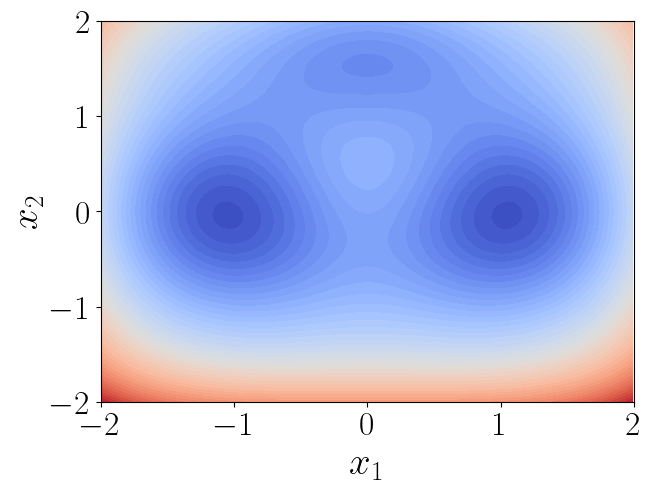

In [22]:
# Plotting the potential function

fig, ax = plt.subplots()
con = ax.contourf(x, y, V_tw, levels=43, cmap='coolwarm')
plt.xticks(np.linspace(-2, 2, 5), fontsize=24)
plt.yticks(np.linspace(-2, 2, 5), fontsize=24)
ax.set_xlabel('$x_1$', fontsize=28)
ax.set_ylabel('$x_2$', fontsize=28)
# plt.savefig('tw2d_potential.pdf')
plt.show()

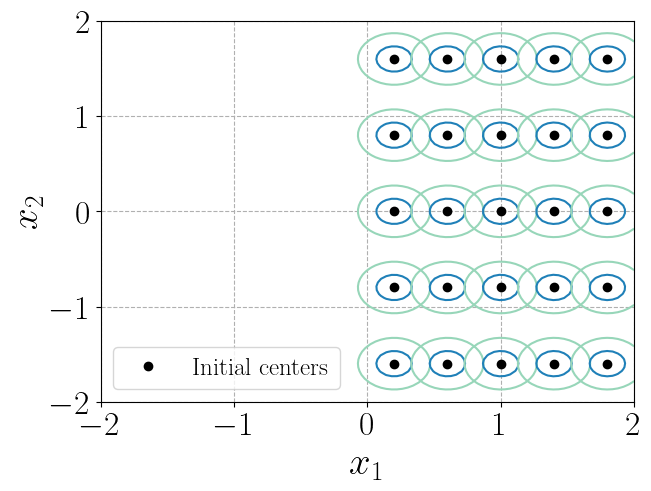

In [24]:
# Plotting the initial basis functions

fig, ax = plt.subplots()
for i in range(n):
    x1, x2, p = generate_surface(X, W_init[i, 0], W_init[i, 1:].reshape(2,1))
    con = ax.contour(x1, x2, p, 2, cmap=cm.YlGnBu)
ax.plot(c[:,0], c[:,1], 'ok', label='Initial centers')
#ax.plot(W_adam[:,1], W_adam[:,2], 'ok', label='Optimized centers')
plt.xticks(np.linspace(-2, 2, 5), fontsize=24)
plt.yticks(np.linspace(-2, 2, 5), fontsize=24)
plt.grid(which='minor', linestyle=':')
plt.grid(which='major', linestyle='--')
ax.set_xlabel('$x_1$', fontsize=28)
ax.set_ylabel('$x_2$', fontsize=28)
ax.legend(fontsize=18, loc='lower left')
# plt.savefig('Initial_basis_tw2d.pdf')
plt.show()

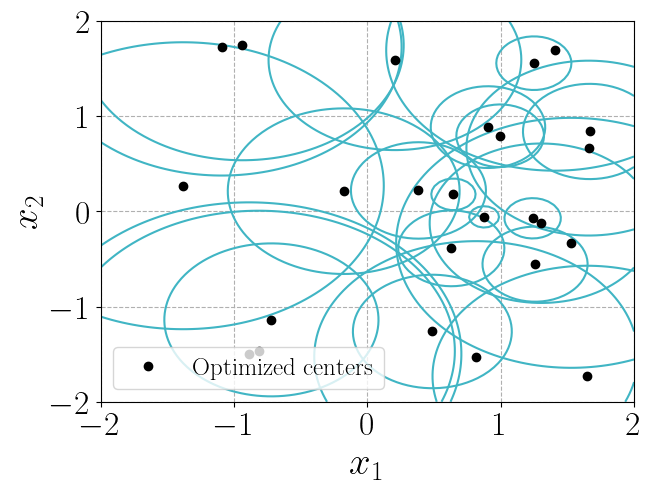

In [23]:
# Plotting 

a = np.linspace(-2, 2, 100)
b = np.linspace(-2, 2, 100)
X = np.vstack((a,b))

fig, ax = plt.subplots()
#con = ax.contourf(x, y, V_tw, levels=50, cmap='coolwarm')
for i in range(n):
    x1, x2, p = generate_surface(X, W_adam[i, 0], W_adam[i, 1:].reshape(2,1))
    con = ax.contour(x1, x2, p, 1, cmap=cm.YlGnBu)
#ax.plot(c[:,0], c[:,1], '*b', label='Initial centers')
ax.plot(W_adam[:,1], W_adam[:,2], 'ok', label='Optimized centers')
plt.xticks(np.linspace(-2, 2, 5), fontsize=24)
plt.yticks(np.linspace(-2, 2, 5), fontsize=24)
ax.grid(which='minor', linestyle=':')
ax.grid(which='major', linestyle='--')
ax.set_xlabel('$x_1$', fontsize=28)
ax.set_ylabel('$x_2$', fontsize=28)
ax.legend(fontsize=18, loc='lower left')
# plt.savefig('Final_basis_tw2d.pdf')
plt.show()

In [25]:
# Calculating the eigenfunction

W_adam_tw_copy = W_adam.copy()
W_adam[:, 1] = W_adam_tw_copy[:, 2]
W_adam[:, 2] = W_adam_tw_copy[:, 1]

# Visualize the eigenfunctions in the full domain of data

bounds2 = np.array([[-2, 2],[-2, 2]])
boxes2 = np.array([100, 100])
Omega2 = domain.discretization(bounds2, boxes2)
C = Omega2.midpointGrid()
PsiC = psi_nD(C, W_adam)

c:\Users\tabis\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


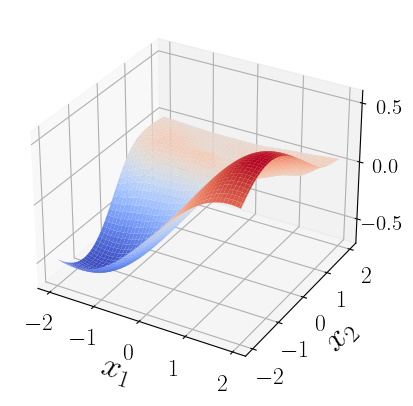

In [ ]:
# Thrird dominant eigenfunction visualization

r = np.real(V_a[:, 2] @ PsiC)
Omega2.plot(r, '3D')

plt.xticks(np.linspace(-2, 2, 5), fontsize=17)
plt.yticks(np.linspace(-2, 2, 5), fontsize=17)
plt.xlabel('$x_1$',fontsize=25)
plt.ylabel('$x_2$',fontsize=25)
plt.tick_params('z', labelsize=15)
# plt.savefig('Second_eigf_tw2d.pdf')
#plt.colorbar()
plt.show()